# **Example:** Read PDF documents with images using Docling Reader

<p style="text-align:center;">
<img src="https://raw.githubusercontent.com/andreshere00/Splitter_MR/refs/heads/main/docs/assets/docling_reader_button.svg#only-light" alt="DoclingReader logo">
<img src="https://raw.githubusercontent.com/andreshere00/Splitter_MR/refs/heads/main/docs/assets/docling_reader_button_white.svg#only-dark" alt="DoclingReader logo">
</p>

As we have seen in previous examples, reading a PDF is not a simple task. In this case, we will see how to read a PDF using the Docling framework, and connect this library into Visual Language Models to extract text or get annotations from images.

## Connecting to a VLM to extract text and analyze images

For this example, we will use the same document as the [previous tutorial](https://github.com/andreshere00/Splitter_MR/blob/main/data/sample_pdf.pdf).

To use a VLM to read images and get annotations, instantiate any model that implements the [`BaseModel` interface](https://andreshere00.github.io/Splitter_MR/api_reference/model/#basemodel) (vision variants inherit from it) and pass it into the [`VanillaReader`](https://andreshere00.github.io/Splitter_MR/api_reference/reader/#vanillareader). Swapping providers only changes the model constructor; your Reader usage remains the same.

### Supported models (and when to use them)

| Model (docs)                                                                                                       | When to use                                       | Required environment variables                                                                                        |
| ------------------------------------------------------------------------------------------------------------------ | ------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------- |
| [`OpenAIVisionModel`](https://andreshere00.github.io/Splitter_MR/api_reference/model/#openaivisionmodel)           | You have an OpenAI API key and want OpenAI cloud. | `OPENAI_API_KEY` (optional: `OPENAI_MODEL`, defaults to `gpt-4o`)                                                     |
| [`AzureOpenAIVisionModel`](https://andreshere00.github.io/Splitter_MR/api_reference/model/#azureopenaivisionmodel) | You use Azure OpenAI Service.                     | `AZURE_OPENAI_API_KEY`, `AZURE_OPENAI_ENDPOINT`, `AZURE_OPENAI_DEPLOYMENT`, `AZURE_OPENAI_API_VERSION`                |
| [`GrokVisionModel`](https://andreshere00.github.io/Splitter_MR/api_reference/model/#grokvisionmodel)               | You have access to xAI Grok multimodal.           | `XAI_API_KEY` (optional: `XAI_MODEL`, default `grok-4`)                                                               |
| [`GeminiVisionModel`](https://andreshere00.github.io/Splitter_MR/api_reference/model/#geminivisionmodel)           | You want Google’s Gemini vision models.           | `GEMINI_API_KEY` (also install extras: `pip install "splitter-mr[multimodal]"`)                                       |
| [`AnthropicVisionModel`](https://andreshere00.github.io/Splitter_MR/api_reference/model/#anthropicvisionmodel)     | You have an Anthropic key (Claude Vision).        | `ANTHROPIC_API_KEY` (optional: `ANTHROPIC_MODEL`)                                                                     |
| [`HuggingFaceVisionModel`](https://andreshere00.github.io/Splitter_MR/api_reference/model/#huggingfacevisionmodel) | You prefer local/open-source/offline inference.   | Install extras: `pip install "splitter-mr[multimodal]"` (optional: `HF_ACCESS_TOKEN` if the chosen model requires it) |

> **Note on HuggingFace models:** Not all HF models are supported (e.g., gated or uncommon architectures). A well-tested option is **SmolDocling**.

### Environment variables

Create a `.env` file alongside your Python script:

<details>
  <summary><strong>Show/hide environment variables needed for every provider</strong></summary>

  <h4>OpenAI</h4> 
```txt
# OpenAI
OPENAI_API_KEY=<your-api-key>
# (optional) OPENAI_MODEL=gpt-4o
```

  <h4>Azure OpenAI</h4>

```txt
# Azure OpenAI
AZURE_OPENAI_API_KEY=<your-api-key>
AZURE_OPENAI_ENDPOINT=<your-endpoint>
AZURE_OPENAI_API_VERSION=<your-api-version>
AZURE_OPENAI_DEPLOYMENT=<your-model-name>
```

  <h4>xAI Grok</h4>

```txt
# xAI Grok
XAI_API_KEY=<your-api-key>
# (optional) XAI_MODEL=grok-4
```

  <h4>Google Gemini</h4>

```txt
# Google Gemini
GEMINI_API_KEY=<your-api-key>
# Also: pip install "splitter-mr[multimodal]"
```

  <h4>Anthropic (Claude Vision)</h4>

```txt
# Anthropic (Claude Vision)
ANTHROPIC_API_KEY=<your-api-key>
# (optional) ANTHROPIC_MODEL=claude-sonnet-4-20250514
```

  <h4>Hugging Face (local/open-source)</h4>

```txt
# Hugging Face (optional, only if needed by the model)
HF_ACCESS_TOKEN=<your-hf-token>
# Also: pip install "splitter-mr[multimodal]"
```

</details>

### Instantiation examples

<details>
  <summary><strong>Show/hide instantiation snippets for all providers</strong></summary>

  <h4>OpenAI</h4>

```python
from splitter_mr.model import OpenAIVisionModel

# Reads OPENAI_API_KEY (and optional OPENAI_MODEL) from .env if present
model = OpenAIVisionModel()
# or pass explicitly:
# model = OpenAIVisionModel(api_key="...", model_name="gpt-4o")
```

  <h4>Azure OpenAI</h4>

```python
from splitter_mr.model import AzureOpenAIVisionModel

# Reads Azure vars from .env if present
model = AzureOpenAIVisionModel()
# or:
# model = AzureOpenAIVisionModel(
#     api_key="...",
#     azure_endpoint="https://<resource>.openai.azure.com/",
#     api_version="2024-02-15-preview",
#     azure_deployment="<your-deployment-name>",
# )
```

  <h4>xAI Grok</h4>

```python
from splitter_mr.model import GrokVisionModel

# Reads XAI_API_KEY (and optional XAI_MODEL) from .env
model = GrokVisionModel()
```

  <h4>Google Gemini</h4>

```python
from splitter_mr.model import GeminiVisionModel

# Requires GEMINI_API_KEY and the 'multimodal' extra installed
model = GeminiVisionModel()
```

  <h4>Anthropic (Claude Vision)</h4>

```python
from splitter_mr.model import AnthropicVisionModel

# Reads ANTHROPIC_API_KEY (and optional ANTHROPIC_MODEL) from .env
model = AnthropicVisionModel()
```

  <h4>Hugging Face (local/open-source)</h4>

```python
from splitter_mr.model import HuggingFaceVisionModel

# Token only if the model requires gating
model = HuggingFaceVisionModel()
```

</details>

In [1]:
from splitter_mr.model import AzureOpenAIVisionModel
from splitter_mr.reader import DoclingReader

file = "data/sample_pdf.pdf"

model = AzureOpenAIVisionModel()


Then, use the `read` method of this object and read a file as always. Once detected that the file is PDF, it will return a ReaderOutput object containing the extracted text.

In [2]:
# 1. Read PDF using a Visual Language Model

print("=" * 80 + " DoclingReader with VLM " + "=" * 80)
docling_reader = DoclingReader(model=model)
docling_output = docling_reader.read(file)

# Get Docling ReaderOutput
print(docling_output.model_dump_json(indent=4))

================================================================================ DoclingReader with VLM ================================================================================
{
    "text": "## A sample PDF\n\nConverting PDF files to other formats, such as Markdown, is a surprisingly complex task due to the nature of the PDF format itself . PDF (Portable Document Format) was designed primarily for preserving the visual layout of documents, making them look the same across different devices and platforms. However, this design goal introduces several challenges when trying to extract and convert the underlying content into a more flexible, structured format like Markdown.\n\nIlustración 1. SplitterMR logo.\n\n<!-- image -->\n*Caption: SplitterMR is a tool designed to chunk your document text, optimizing it for production-ready large language model applications.*\n\n## 1. Lack of Structural Information\n\nUnlike formats such as HTML or DOCX, PDFs generally do not store informatio


As we can see, the PDF contents along with some metadata information such as the `conversion_method`, `reader_method` or the `ocr_method` have been retrieved. To get the PDF contents, you can simply access to the `text` attribute as always:

In [3]:
# Get text attribute from Docling Reader
print(docling_output.text)

## A sample PDF

Converting PDF files to other formats, such as Markdown, is a surprisingly complex task due to the nature of the PDF format itself . PDF (Portable Document Format) was designed primarily for preserving the visual layout of documents, making them look the same across different devices and platforms. However, this design goal introduces several challenges when trying to extract and convert the underlying content into a more flexible, structured format like Markdown.

Ilustración 1. SplitterMR logo.

<!-- image -->
*Caption: SplitterMR is a tool designed to chunk your document text, optimizing it for production-ready large language model applications.*

## 1. Lack of Structural Information

Unlike formats such as HTML or DOCX, PDFs generally do not store information about the logical structure of the document -such as headings, paragraphs, lists, or tables. Instead, PDFs are often a collection of text blocks, images, and graphical elements placed at specific coordinates o


As seen, all the images have been described using a caption. 

## Experimenting with some keyword arguments

In case that you have additional requirements to describe these images, you can provide a prompt via a `prompt` argument:

In [4]:
docling_output = docling_reader.read(
    file, prompt="Describe the image briefly in Spanish."
)

print(docling_output.text)

## A sample PDF

Converting PDF files to other formats, such as Markdown, is a surprisingly complex task due to the nature of the PDF format itself . PDF (Portable Document Format) was designed primarily for preserving the visual layout of documents, making them look the same across different devices and platforms. However, this design goal introduces several challenges when trying to extract and convert the underlying content into a more flexible, structured format like Markdown.

Ilustración 1. SplitterMR logo.

<!-- image -->
La imagen muestra el logotipo de "SplitterMR", que incluye un gráfico estilizado de un diseño de red con un símbolo centrado. Abajo del logotipo, hay un eslogan en inglés que dice: "Chunk your documents text for production-ready LLM applications", lo que sugiere que la herramienta está destinada a dividir textos de documentos para aplicaciones listas para producción relacionadas con modelos de lenguaje.

## 1. Lack of Structural Information

Unlike formats such


You can read the PDF scanning the pages as images and extracting its content. To do so, enable the option `scan_pdf_pages = True`. In case that you want to change the placeholder, you can do it passing the keyword argument `placeholder = <your desired placeholder>`.

Finally, it could be interesting extract the markdown text with the images as embedded content. In that case, activate the option `show_base64_images`. In that case, it is not necessary to pass the model to the Reader class.

## A sample PDF

Converting PDF files to other formats, such as Markdown, is a surprisingly complex task due to the nature of the PDF format itself . PDF (Portable Document Format) was designed primarily for preserving the visual layout of documents, making them look the same across different devices and platforms. However, this design goal introduces several challenges when trying to extract and convert the underlying content into a more flexible, structured format like Markdown.

Ilustración 1. SplitterMR logo.



## 1. Lack of Structural Information

Unlike formats such as HTML or DOCX, PDFs generally do not store information about the logical structure of the document -such as headings, paragraphs, lists, or tables. Instead, PDFs are often a collection of text blocks, images, and graphical elements placed at specific coordinates on a page. This makes it difficult to accurately infer the intended structure, such as determining what text is a heading versus a regular paragraph.

## 2
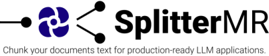
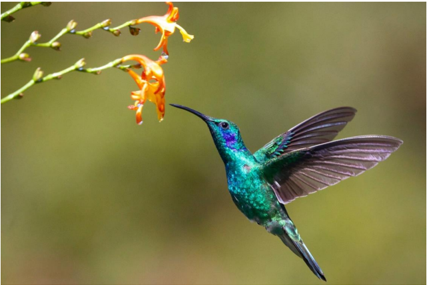

In [5]:
docling_reader = DoclingReader()
docling_output = docling_reader.read(file, show_base64_images=True)

print(docling_output.text)


Of course, remember that the use of a VLM is not mandatory, and you can read the PDF obtaining most of the information.

## Complete script

```python
from splitter_mr.model import AzureOpenAIVisionModel
from splitter_mr.reader import DoclingReader
from dotenv import load_dotenv

load_dotenv()

file = "data/sample_pdf.pdf"

model = AzureOpenAIVisionModel()
docling_reader = DoclingReader(model = model)

# 1. Read PDF using a Visual Language Model

docling_output = docling_reader.read(file)
print(docling_output.model_dump_json(indent=4))  # Get Docling ReaderOutput
print(docling_output.text)  # Get text attribute from Docling Reader

# 2. Describe the images using a custom prompt

docling_output = docling_reader.read(file, prompt = "Describe the image briefly in Spanish.")
print(docling_output.text)

# 3. Scan PDF pages 

docling_output = docling_reader.read(file, scan_pdf_pages = True)
print(docling_output.text)

# 4. Extract images as embedded content

docling_reader = DoclingReader()
docling_output = docling_reader.read(file, show_base64_images = True)
print(docling_output.text)
```


!!! note
    For more on available options, see the [**DoclingReader class documentation**](../../api_reference/reader.md#doclingreader).